In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
FILE_PATH = 'data/pilot3.json'
#pilot3.json has 10 anagrams -- each subject sees three anagrams randomly -- possible confound of ordering effects
#pilot4.json has 10 anagrams as well -- each subject only sees 1 anagram randomly. 
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

144

In [3]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'SROT', 'BLUK', 'PITN', 'SONW', 'VLVOO', 'KHAOMCM', 'IORCNAG', 'HNATUYG', 'DALRBEU']
    idx = []
    for i in range(len(user_order)):
        idx.append(order.index(user_order[i]))
    return idx

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

72 72


In [4]:
#get subject data for the 10 anagrams

time_guess = [[] for i in range(10)] 
actual_rt = [[] for i in range(10)]
give_up = [[] for i in range(10)]
aha = [[] for i in range(10)]

for entry in finish: 
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    
    time_guess[idx[0]].append(entry_data[5]['response']) #5 is first time estimation
    
    counter = 6    
    rt = entry_data[6]['rt']
    attempt = entry_data[6]['responses'] 
    g = 0

    while anagrams_answers[0].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
        if "next" in attempt.lower(): #break if person gave up
            g = 1
            break
        else:                
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']  
            
    give_up[idx[0]].append(g) #did subject give up or not
    actual_rt[idx[0]].append(rt) #append actual time to complete

    counter = counter+1    
    r = entry_data[counter]['responses'] #aha rating
    aha[idx[0]].append(int(r[6]))

    #data for second anagram    
    counter = counter+3
    time_guess[idx[1]].append(entry_data[counter]['response']) #time estimation

    counter = counter+1   
    rt = entry_data[counter]['rt']
    attempt = entry_data[counter]['responses']
    g = 0
    while anagrams_answers[1].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up,         
        if "next" in attempt.lower(): #break if person gave up 
            g = 1 #person gave up
            break
        else:
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']   
    
    give_up[idx[1]].append(g)
    actual_rt[idx[1]].append(rt) #append actual time to complete

    counter = counter+1
    r = entry_data[counter]['responses'] #aha rating
    aha[idx[1]].append(int(r[6]))

    #data for third anagram    
    counter = counter+3
    time_guess[idx[2]].append(entry_data[counter]['response']) #time estimation
    g = 0
    counter = counter+1   
    rt = entry_data[counter]['rt']
    attempt = entry_data[counter]['responses']    
    
    while anagrams_answers[2].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up        
        if "next" in attempt.lower(): #break if person gave up
            g = 1
            break
        else:            
            rt = rt+entry_data[counter]['rt']
            counter = counter+1
            attempt = entry_data[counter]['responses']    
            
    give_up[idx[2]].append(g) #add if subject gave up or not
    actual_rt[idx[2]].append(rt) #append actual time to complete
    
    counter = counter+1
    r = entry_data[counter]['responses'] #aha rating    
    aha[idx[2]].append(int(r[6]))

In [5]:
#data conversion, clean-up, and storage here

mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []
mean_tpe2 = []
mean_aha2 = []

for i in range(10): #go through all 10 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*30 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = time_guess_i-actual_rt_i
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    mean_tpe2.append(tpe_i/60) #this is for power analysis later on
    mean_aha2.append(aha_i)
    print('Time guess:', np.mean(time_guess_i), 'Actual RT:',np.mean(actual_rt_i), 'TPE:', np.mean(tpe_i), 'AHA:',np.mean(aha_i), 'numSubs:', len(aha_i))
    
    


Time guess: 19.0 Actual RT: 3.1215555555555556 TPE: 15.878444444444446 AHA: 2.611111111111111 numSubs: 18
Time guess: 19.894736842105264 Actual RT: 13.187631578947366 TPE: 6.707105263157894 AHA: 3.0526315789473686 numSubs: 19
Time guess: 33.81818181818182 Actual RT: 8.919818181818181 TPE: 24.898363636363637 AHA: 4.136363636363637 numSubs: 22
Time guess: 34.758620689655174 Actual RT: 15.076758620689658 TPE: 19.681862068965515 AHA: 2.8620689655172415 numSubs: 29
Time guess: 25.363636363636363 Actual RT: 7.290590909090909 TPE: 18.073045454545458 AHA: 2.3181818181818183 numSubs: 22
Time guess: 75.75 Actual RT: 14.032000000000002 TPE: 61.718 AHA: 3.0625 numSubs: 16
Time guess: 110.5 Actual RT: 43.44466666666667 TPE: 67.05533333333334 AHA: 3.9166666666666665 numSubs: 12
Time guess: 70.0909090909091 Actual RT: 42.27009090909091 TPE: 27.820818181818183 AHA: 4.363636363636363 numSubs: 11
Time guess: 120.0 Actual RT: 26.632545454545458 TPE: 93.36745454545456 AHA: 4.545454545454546 numSubs: 11
Ti

        aha anagrams        rt       tpe
0  2.611111      the  0.052026  0.264641
1  3.052632     sort  0.219794  0.111785
2  4.136364     bulk  0.148664  0.414973
3  2.862069     pint  0.251279  0.328031
4  2.318182     snow  0.121510  0.301217
5  3.062500    volvo  0.233867  1.028633
6  3.916667  hammock  0.724078  1.117589
7  4.363636  organic  0.704502  0.463680
8  4.545455  naughty  0.443876  1.556124
9  4.200000  durable  0.700063  1.504937
[[1.         0.62495646]
 [0.62495646 1.        ]]
[[1.         0.72510973]
 [0.72510973 1.        ]]


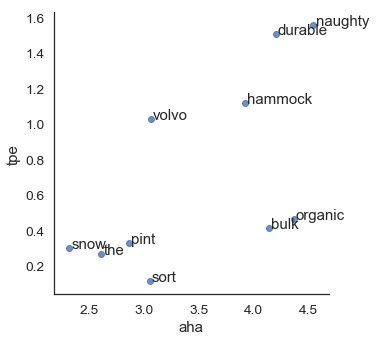

In [6]:
import seaborn as sns
import pandas as pd
sns.set(style="white", font_scale=1.25)

df = pd.DataFrame({'anagrams': ['the', 'sort', 'bulk', 'pint', 'snow', 'volvo', 'hammock', 'organic', 'naughty', 'durable'],
    'tpe': mean_tpe,
    'aha': mean_aha,
     'rt':  mean_rt})
print(df)
#sns.lmplot('aha', 'tpe', data=df, fit_reg=False)
#label_point(df['aha'], df['tpe'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
sns.lmplot('aha', 'tpe', data=df, fit_reg=False)
label_point(df['aha'], df['tpe'], df['anagrams'] , plt.gca()) #function to label point in scatter plot

print(np.corrcoef(df['aha'], df['tpe'])) 
print(np.corrcoef(df['aha'], df['rt'])) 

In [10]:
from scipy import stats
import statsmodels.api as sm
import math

all_predictors = ['tpe', 'rt']
X = df[all_predictors]
y = df['aha']
X = sm.add_constant(X)

linear_model = sm.OLS(y, X)
results = linear_model.fit()
predictions = results.predict(X)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    aha   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     4.767
Date:                Fri, 30 Aug 2019   Prob (F-statistic):             0.0494
Time:                        19:06:26   Log-Likelihood:                -7.2472
No. Observations:                  10   AIC:                             20.49
Df Residuals:                       7   BIC:                             21.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5933      0.352      7.361      0.0

C:\Users\RACH0_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


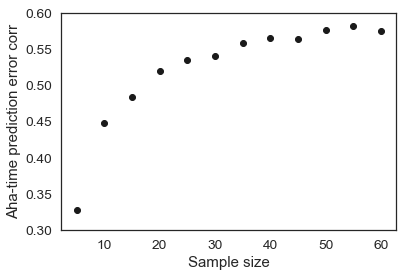

In [15]:
#power analysis
import matplotlib.pyplot as plt

for n in [5,10,15,20,25,30,35,40,45,50,55,60]:
    aha = []
    tpe = []
    means = []
    for l in range(1000):
        for i in range(len(mean_aha)):
            a = np.random.choice(mean_aha2[i],n)
            aha.append(np.mean(a))
            b = np.random.choice(mean_tpe2[i],n)
            tpe.append(np.mean(b))        
        c = np.corrcoef(aha, tpe)
        means.append(c[1][0])
        
    plt.errorbar(n, np.mean(means), np.std(means)/np.sqrt(len(means)), marker='o', color = 'k')
    plt.xlabel('Sample size')
    plt.ylabel('Aha-time prediction error corr')
    plt.ylim([0.30,0.60])

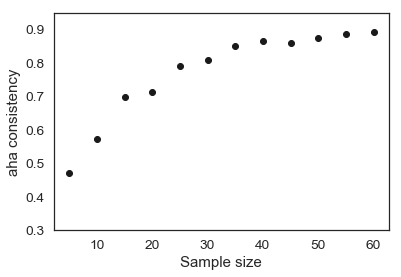

In [22]:
for n in [5,10,15,20,25,30,35,40,45,50,55,60]:
    aha = []
    tpe = []
    means = []
    for l in range(100):
        for i in range(len(mean_aha)):
            a = np.random.choice(mean_aha2[i],n)
            aha.append(np.mean(a))
            b = np.random.choice(mean_aha2[i],n)
            tpe.append(np.mean(b))        
        c = np.corrcoef(aha, tpe)
        means.append(c[1][0])
        
    plt.errorbar(n, np.mean(means), np.std(means)/np.sqrt(len(means)), marker='o', color = 'k')
    plt.xlabel('Sample size')
    plt.ylabel('aha consistency')
    plt.ylim([0.30,0.95])

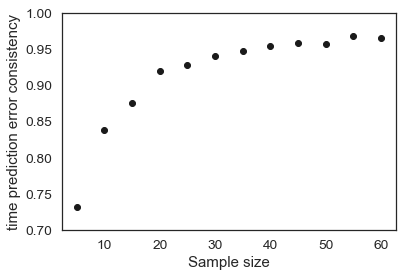

In [19]:
for n in [5,10,15,20,25,30,35,40,45,50,55,60]:
    aha = []
    tpe = []
    means = []
    for l in range(100):
        for i in range(len(mean_aha)):
            a = np.random.choice(mean_tpe2[i],n)
            aha.append(np.mean(a))
            b = np.random.choice(mean_tpe2[i],n)
            tpe.append(np.mean(b))        
        c = np.corrcoef(aha, tpe)
        means.append(c[1][0])
        
    plt.errorbar(n, np.mean(means), np.std(means)/np.sqrt(len(means)), marker='o', color = 'k')
    plt.xlabel('Sample size')
    plt.ylabel('time prediction error consistency')
    plt.ylim([0.7,1])